<a href="https://colab.research.google.com/github/jeongminuk/AI_CIFAR10_Classification/blob/main/%5BAI2025_Assignment%5D_21101226_%EC%A0%95%EB%AF%BC%EC%9A%B1_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [35]:
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)
    ),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train neural network

In [36]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.3369 - loss: 2.2345
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5425 - loss: 1.3178
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6168 - loss: 1.1002
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6597 - loss: 0.9780
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6862 - loss: 0.9025
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7136 - loss: 0.8329
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7313 - loss: 0.7701
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7513 - loss: 0.7089
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7657 - loss: 0.6684
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7769 - loss: 0.6413


## Evaluate neural network performance


In [37]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.7680 - loss: 0.6708


[0.6707808971405029, 0.7680000066757202]

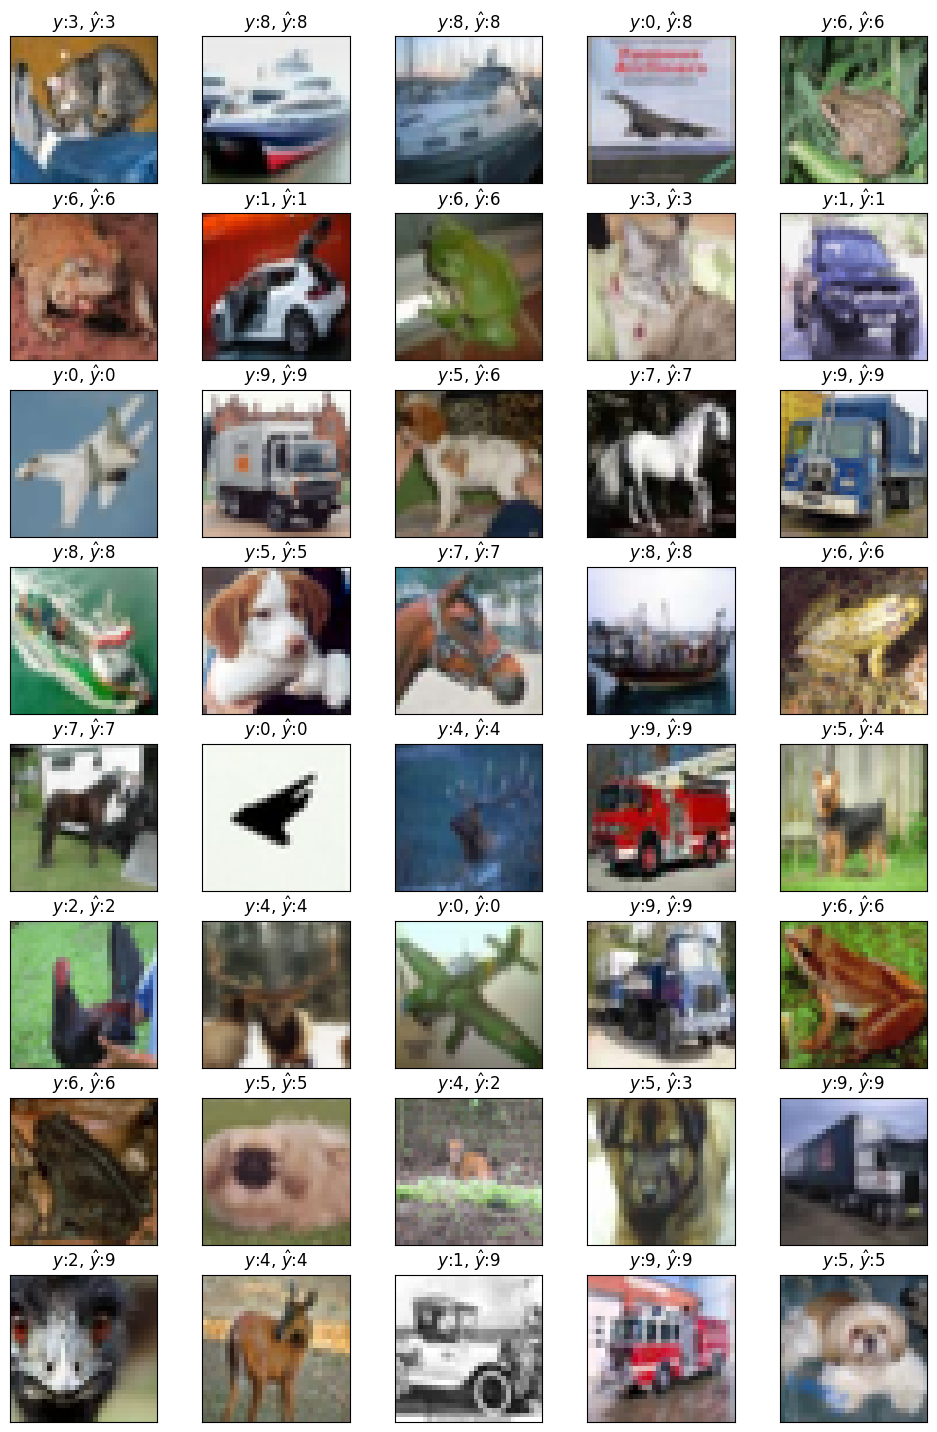

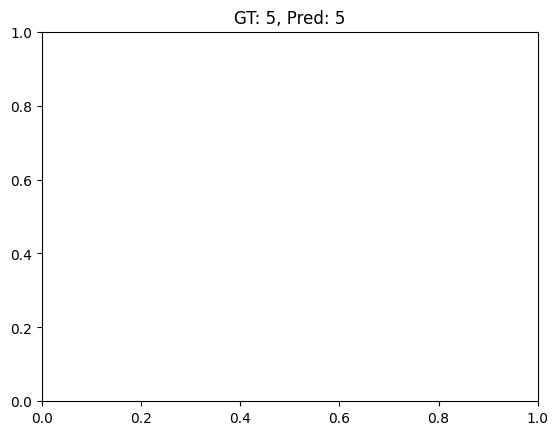

In [38]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [39]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7680000066757202
